In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing, SARIMAX, Holt, ARIMA
from statsmodels.tsa.
import warnings
warnings.filterwarnings("ignore")

In [4]:
df_Sales = pd.read_csv('D:\Hunt\FedEx\SalesData.csv')

In [5]:
df_Sales.head()

,Month-Year,Period,Sales
0,Jul-09,1,3303
1,Aug-09,2,3360
2,Sep-09,3,3828
3,Oct-09,4,4257
4,Nov-09,5,5508


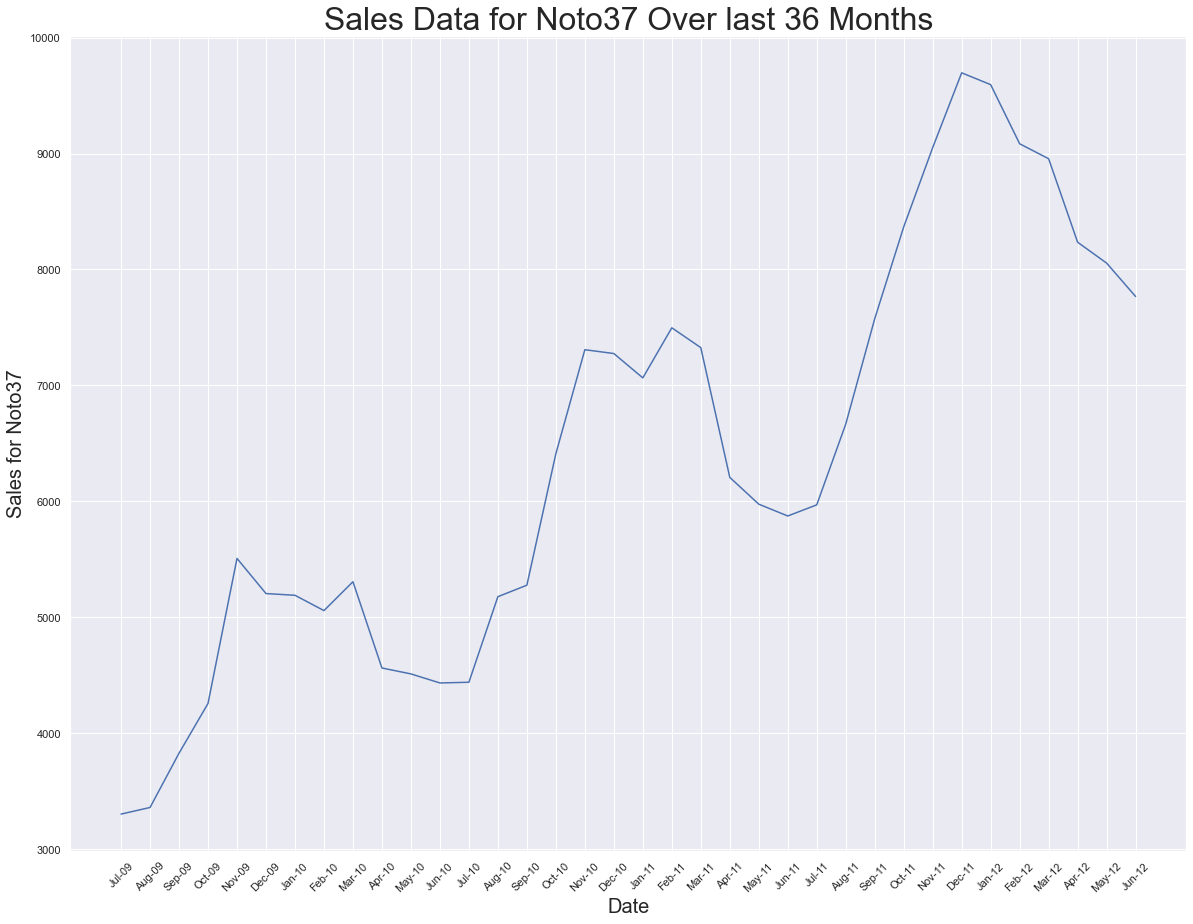

In [6]:
sns.set(rc = {'figure.figsize':(20, 15)})
plt.ylabel('Sales for Noto37', fontsize = 20)
plt.xlabel('Date', fontsize = 20)
plt.title('Sales Data for Noto37 Over last 36 Months', fontsize = 32)
plt.xticks(rotation = 45)
plt.plot(df_Sales['Month-Year'], df_Sales['Sales'])

In [7]:
train = df_Sales[df_Sales['Period '] <= 33]
test = df_Sales[df_Sales['Period '] > 33]

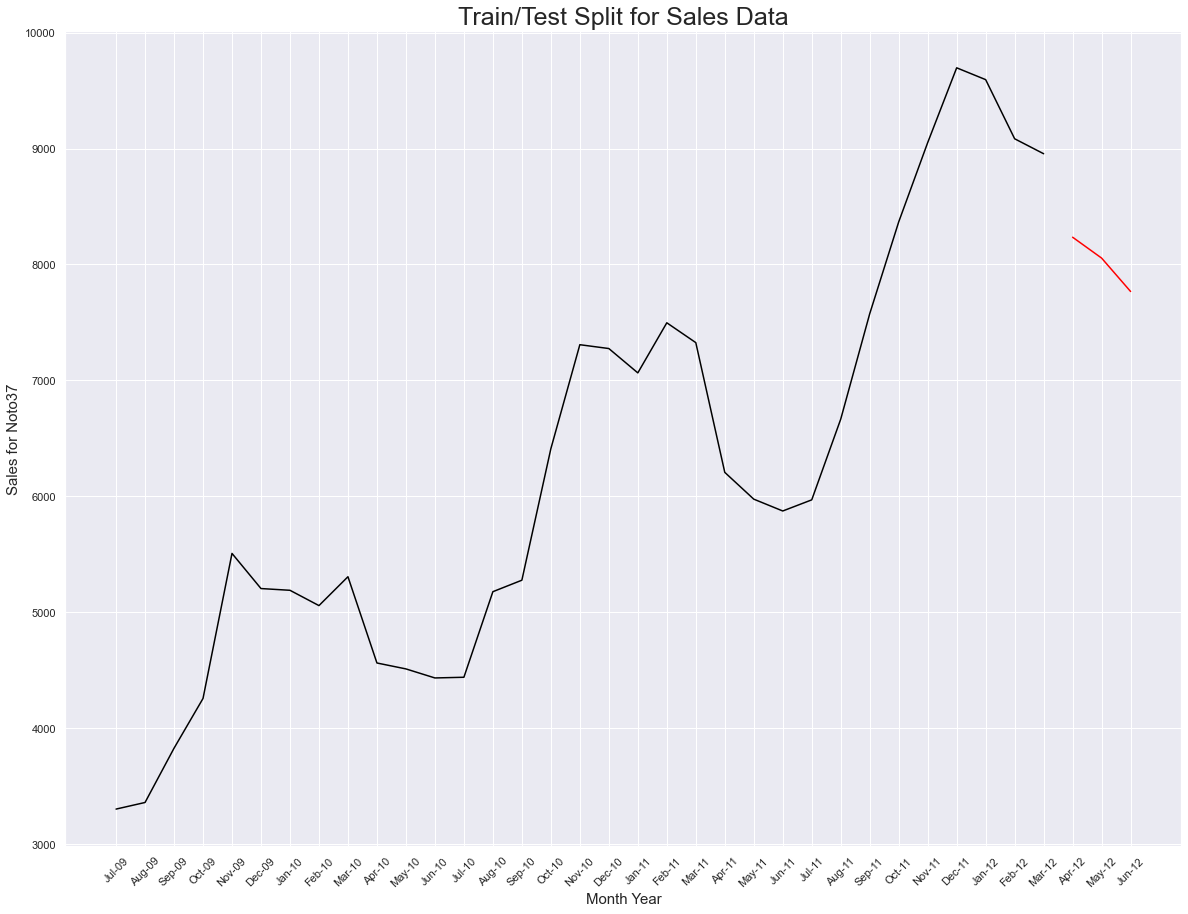

In [8]:
plt.plot(train['Month-Year'], train['Sales'], color = 'black')
plt.plot(test['Month-Year'], test['Sales'], color = 'red')
plt.ylabel('Sales for Noto37', fontsize = 15)
plt.xlabel('Month Year', fontsize = 15)
plt.xticks(rotation = 45)
plt.title('Train/Test Split for Sales Data', fontsize=25)
plt.show()

In [9]:
train.head()
test.head()

,Month-Year,Period,Sales
33,Apr-12,34,8235
34,May-12,35,8055
35,Jun-12,36,7767


Root Mean Square for Our Prediction at Smoothing Level 0.2 is :  497.72
Mean Absolute Percentage Error (MAPE): 5.78 %


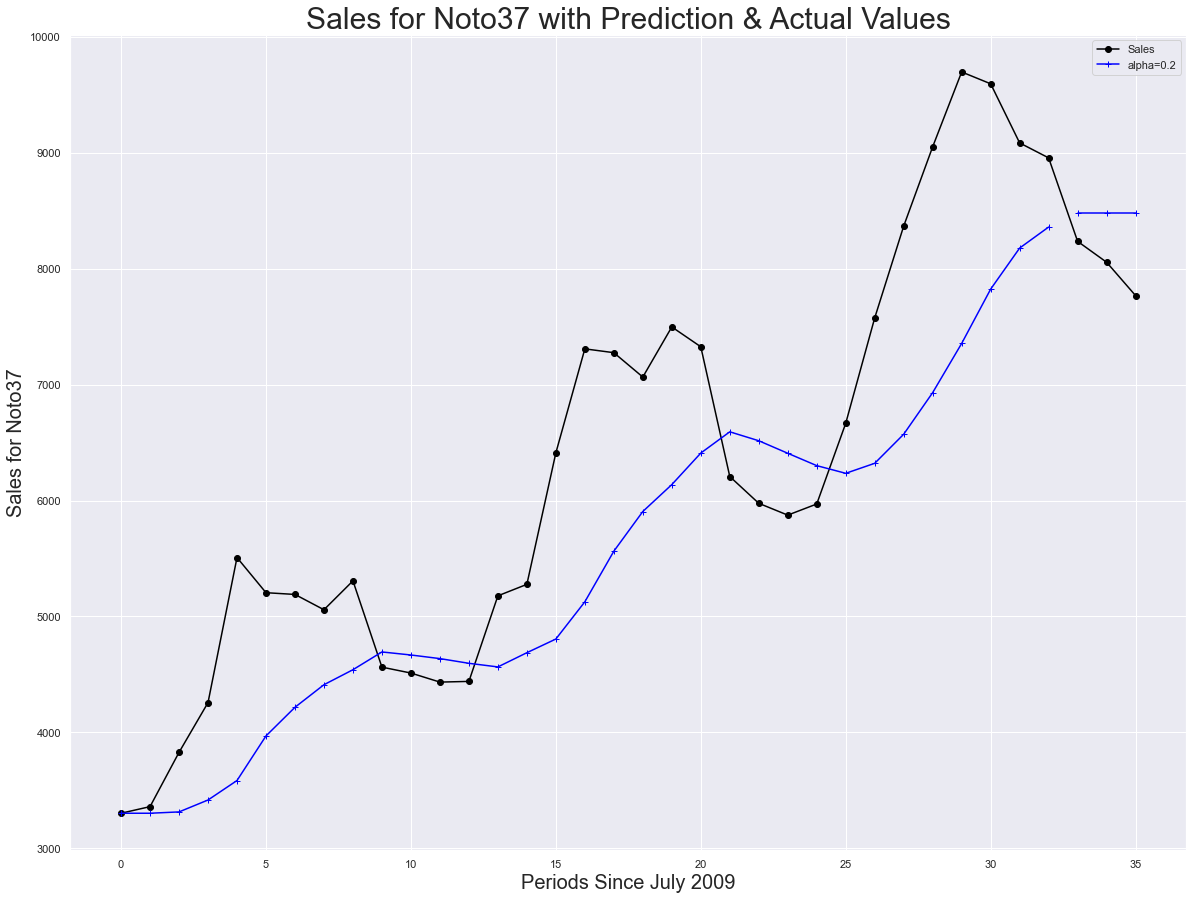

In [25]:
fit = SimpleExpSmoothing(train['Sales']).fit(smoothing_level=0.2, optimized=False)
pred = fit.forecast(3).rename('alpha=0.2')
plt.title('Sales for Noto37 with Prediction & Actual Values', fontsize = 30)
plt.xlabel('Periods Since July 2009', fontsize = 20)
plt.ylabel('Sales for Noto37', fontsize = 20)
ax = df_Sales['Sales'].plot(marker='o', color='black', legend=True)
pred.plot(marker='+', ax=ax, color='blue', legend=True)
fit.fittedvalues.plot(marker='+', ax=ax, color='blue')
mse = ((pred - test['Sales']) ** 2).mean()
print('Root Mean Square for Our Prediction at Smoothing Level 0.2 is : ', round(np.sqrt(mse), 2))
MAPE = np.mean((np.abs(np.subtract(pred, test['Sales'])/ test['Sales']))) * 100
print('Mean Absolute Percentage Error (MAPE): ' + str(np.round(MAPE, 2)) + ' %')

Root Mean Square for Our Prediction  at Smoothing Level 0.4 is :  1029.0
Mean Absolute Percentage Error (MAPE): 12.67 %


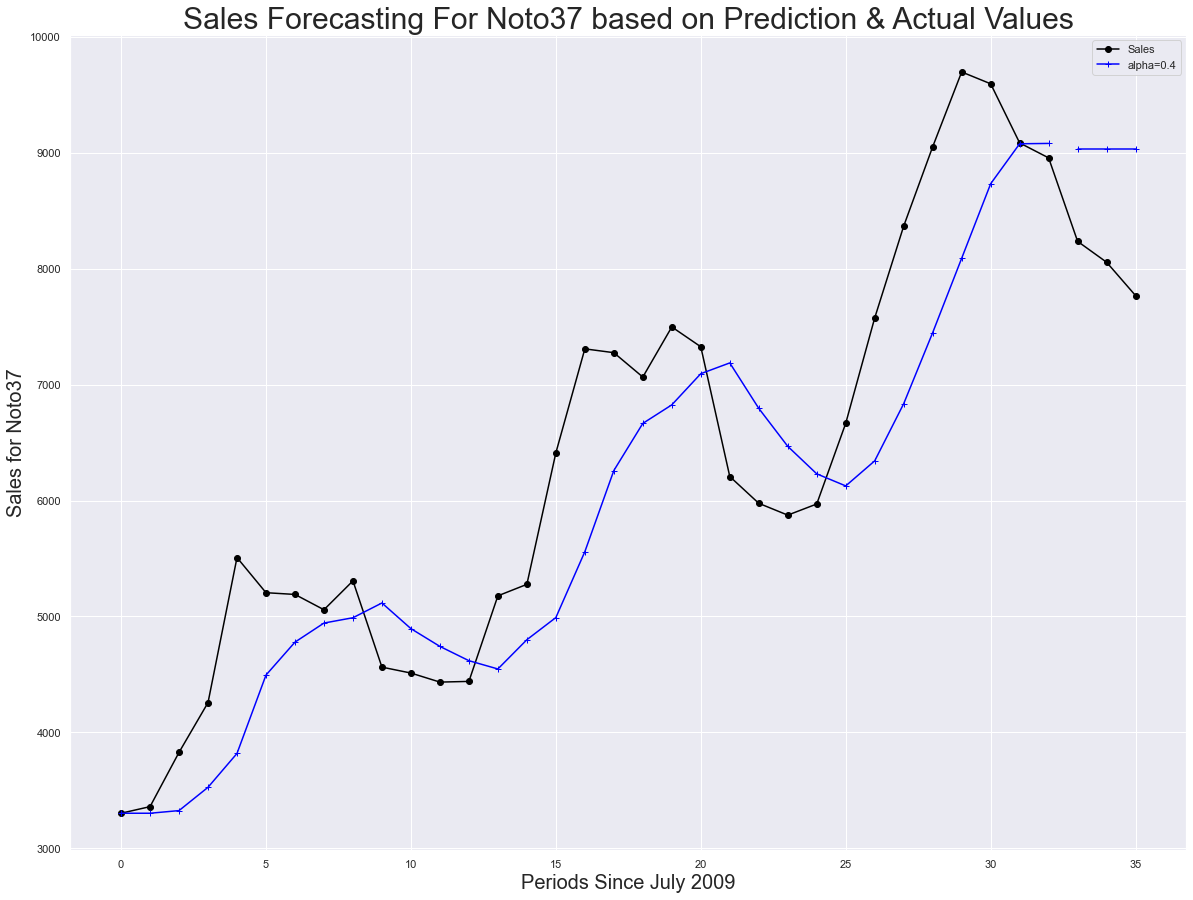

In [27]:
fit2 = SimpleExpSmoothing(train['Sales']).fit(smoothing_level = 0.4, optimized=False)
pred2 = fit2.forecast(3).rename('alpha=0.4')
plt.title('Sales Forecasting For Noto37 based on Prediction & Actual Values', fontsize = 30)
plt.xlabel('Periods Since July 2009', fontsize = 20)
plt.ylabel('Sales for Noto37', fontsize = 20)
ax = df_Sales['Sales'].plot(marker='o', color='black', legend=True)
pred2.plot(marker='+', ax=ax, color='blue', legend=True)
fit2.fittedvalues.plot(marker='+', ax=ax, color='blue')
mse = ((pred2 - test['Sales']) ** 2).mean()
print('Root Mean Square for Our Prediction  at Smoothing Level 0.4 is : ', round(np.sqrt(mse),2))
MAPE = np.mean((np.abs(np.subtract(pred2, test['Sales'])/ test['Sales']))) * 100
print('Mean Absolute Percentage Error (MAPE): ' + str(np.round(MAPE, 2)) + ' %')

Root Mean Square for Our Prediction is :  956.28
Mean Absolute Percentage Error (MAPE): 11.75 %


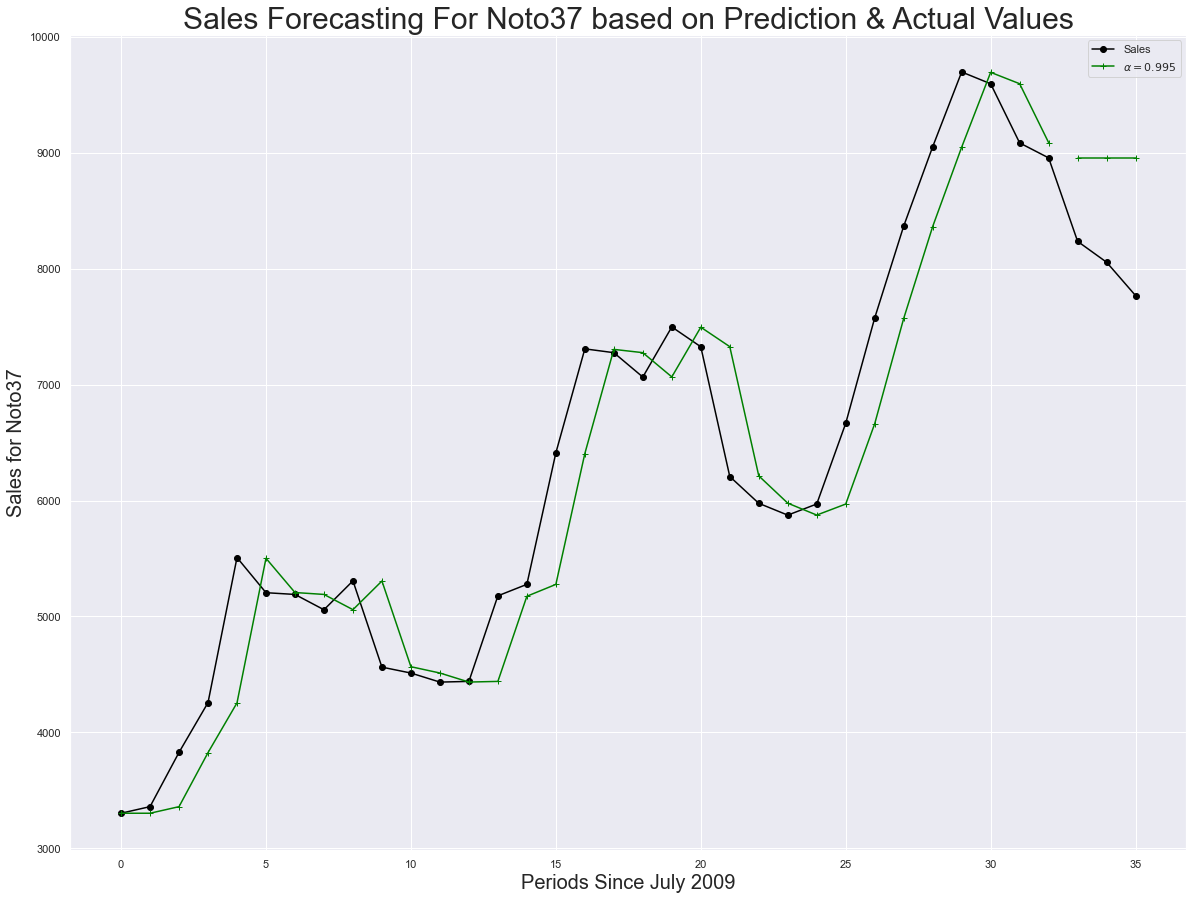

In [28]:
fit3 = SimpleExpSmoothing(train['Sales']).fit(optimized=True)
pred3 = fit3.forecast(3).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])
plt.title('Sales Forecasting For Noto37 based on Prediction & Actual Values', fontsize = 30)
plt.xlabel('Periods Since July 2009', fontsize = 20)
plt.ylabel('Sales for Noto37', fontsize = 20)
ax = df_Sales['Sales'].plot(marker='o', color='black', legend=True)
pred3.plot(marker='+', ax=ax, color='green', legend=True)
fit3.fittedvalues.plot(marker='+', ax=ax, color='green')
mse = ((pred3 - test['Sales']) ** 2).mean()
print('Root Mean Square for Our Prediction is : ', round(np.sqrt(mse),2))
MAPE = np.mean((np.abs(np.subtract(pred3, test['Sales'])/ test['Sales']))) * 100
print('Mean Absolute Percentage Error (MAPE): ' + str(np.round(MAPE, 2)) + ' %')

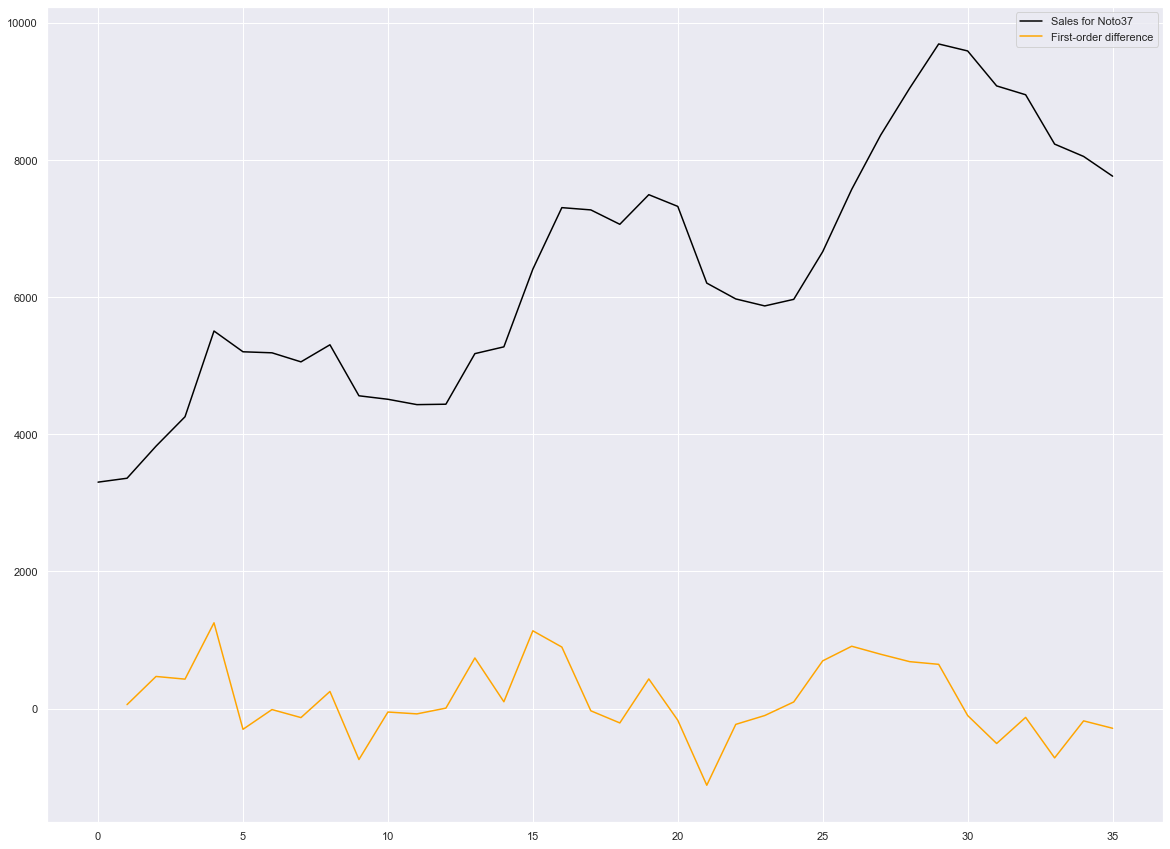

In [29]:
df_Sales['Sales_Diff'] = df_Sales['Sales'].diff(periods=1)

plt.plot(df_Sales['Sales'], label='Sales for Noto37', color = 'black')
plt.plot(df_Sales['Sales_Diff'], label='First-order difference', color='orange')

plt.legend()

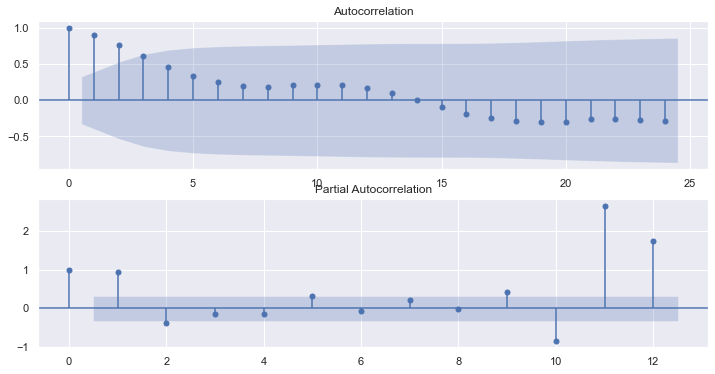

In [30]:
fig, ax = plt.subplots(2, figsize=(12,6))
ax[0] = plot_acf(df_Sales['Sales'], ax=ax[0], lags=24)
ax[1] = plot_pacf(df_Sales['Sales'], ax=ax[1], lags=12)

In [31]:
#df_Sales.set_index('Month-Year', inplace=True)
analysis = df_Sales[['Sales']].copy()
analysis.head()

,Sales
0,3303
1,3360
2,3828
3,4257
4,5508


In [32]:
result = seasonal_decompose(analysis, model='multiplicative', period=12)

Text(0, 0.5, 'Sales Amuonts')

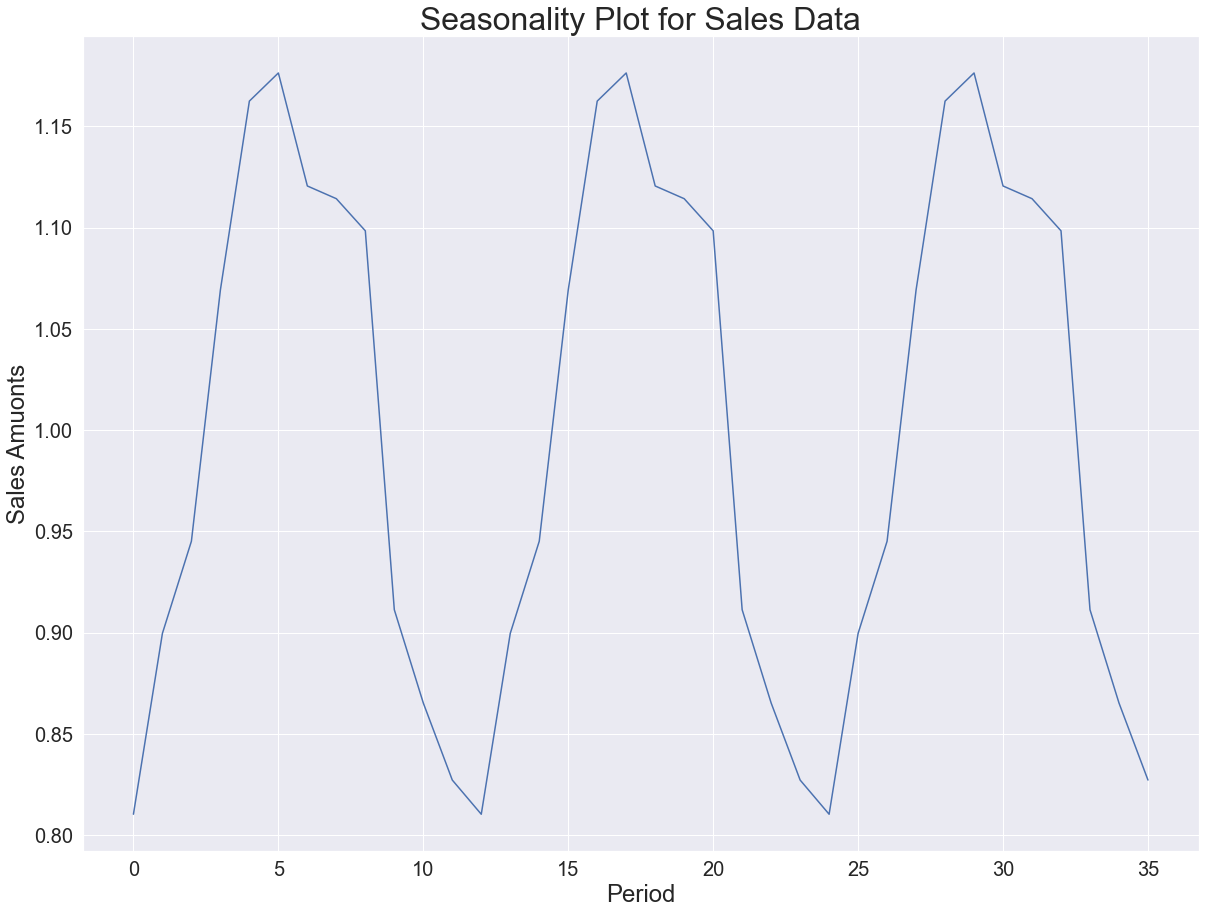

In [47]:
#result.plot()
ax = result.seasonal.plot(fontsize = 20)
ax.set_title('Seasonality Plot for Sales Data', fontsize = 32)
ax.set_xlabel('Period', fontsize = 24)
ax.set_ylabel('Sales Amuonts', fontsize = 24)

Text(0, 0.5, 'Sales Amuonts')

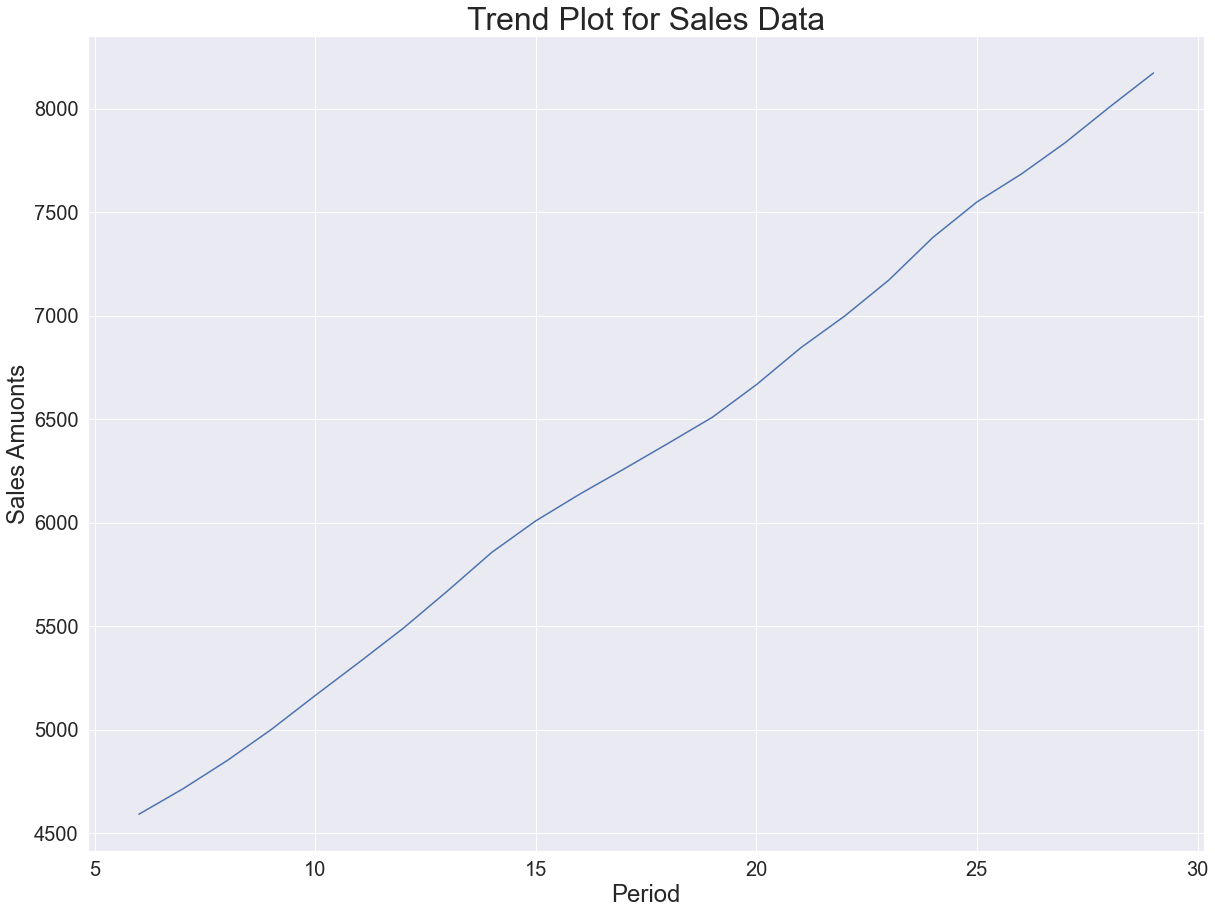

In [46]:
ax = result.trend.plot(fontsize = 20)
ax.set_title('Trend Plot for Sales Data', fontsize = 32)
ax.set_xlabel('Period', fontsize = 24)
ax.set_ylabel('Sales Amuonts', fontsize = 24)

Root Mean Square for Our Prediction with Holt-Winters Model is :  149.67
Mean Absolute Percentage Error (MAPE): 1.72 %
AIC Values for Holt Winter Seaonal Smoothing:  149.67050871677708


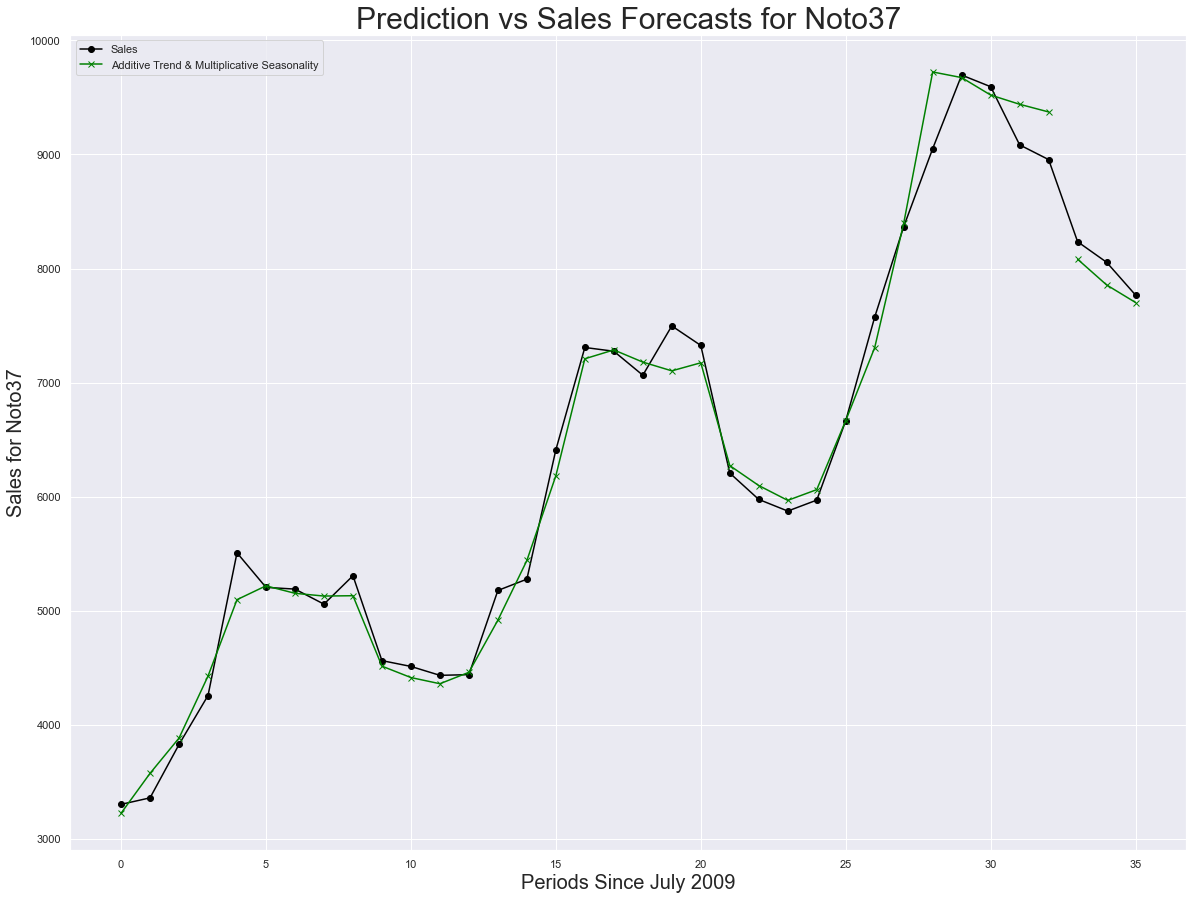

In [61]:
fit4 = ExponentialSmoothing(train['Sales'], seasonal_periods=12, trend = 'add', seasonal = 'mul').fit(use_boxcox=True)
pred4 = fit4.forecast(3).rename('Additive Trend & Multiplicative Seasonality')
plt.title('Prediction vs Sales Forecasts for Noto37', fontsize = 30)
plt.xlabel('Periods Since July 2009', fontsize = 20)
plt.ylabel('Sales for Noto37', fontsize = 20)
ax = df_Sales['Sales'].plot(marker='o', color='black', legend=True)
pred4.plot(marker='x', ax=ax, color='green', legend=True)
fit4.fittedvalues.plot(marker='x', ax=ax, color='green')
mse = ((pred4 - test['Sales']) ** 2).mean()
print('Root Mean Square for Our Prediction with Holt-Winters Model is : ', round(np.sqrt(mse),2))
MAPE = np.mean((np.abs(np.subtract(pred4, test['Sales'])/ test['Sales']))) * 100
print('Mean Absolute Percentage Error (MAPE): ' + str(np.round(MAPE, 2)) + ' %')
print('AIC Values for Holt Winter Seaonal Smoothing: ', np.sqrt(np.mean(np.square(test['Sales'] - pred4))))

Root Mean Square for Our Prediction with Holt-Winters Model is :  203.52
Mean Absolute Percentage Error (MAPE): 2.38 %


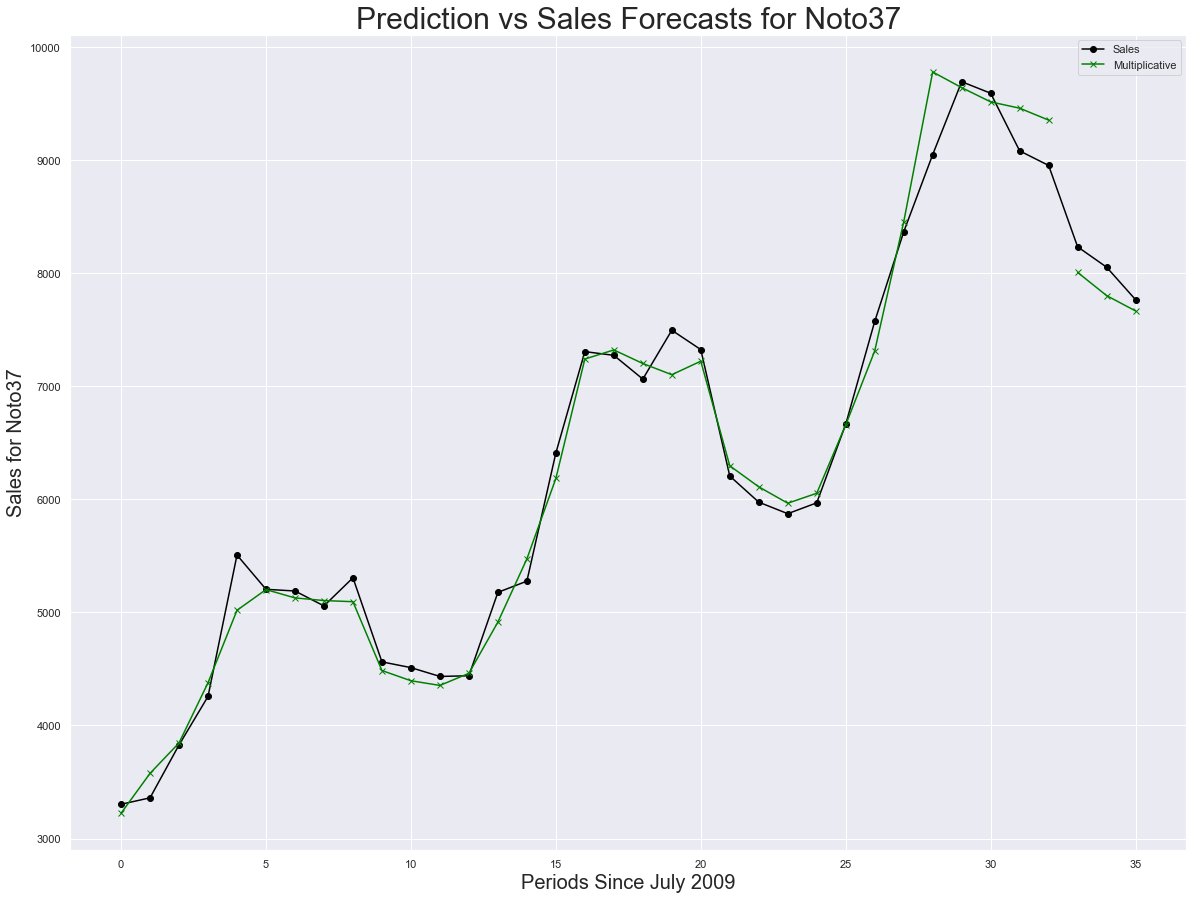

In [48]:
fit5 = ExponentialSmoothing(train['Sales'], seasonal_periods=12, trend = 'mul', seasonal = 'mul').fit(use_boxcox=True)
pred5 = fit5.forecast(3).rename('Multiplicative')
plt.title('Prediction vs Sales Forecasts for Noto37', fontsize = 30)
plt.xlabel('Periods Since July 2009', fontsize = 20)
plt.ylabel('Sales for Noto37', fontsize = 20)
ax = df_Sales['Sales'].plot(marker='o', color='black', legend=True)
pred5.plot(marker='x', ax=ax, color='green', legend=True)
fit5.fittedvalues.plot(marker='x', ax=ax, color='green')
mse = ((pred5 - test['Sales']) ** 2).mean()
print('Root Mean Square for Our Prediction with Holt-Winters Model is : ', round(np.sqrt(mse),2))
MAPE = np.mean((np.abs(np.subtract(pred5, test['Sales'])/ test['Sales']))) * 100
print('Mean Absolute Percentage Error (MAPE): ' + str(np.round(MAPE, 2)) + ' %')

In [52]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
adf_test(df_Sales['Sales'])


Results of Dickey-Fuller Test:
Test Statistic                  1.316291
p-value                         0.996699
#Lags Used                     10.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64


In [56]:
#fig, ax = plt.subplots(2, figsize=(12,6))
#ax[0] = plot_acf(df_Sales['Sales'], ax=ax[0], lags=24)
#ax[1] = plot_pacf(df_Sales['Sales'], ax=ax[1], lags=12)
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_Sales['Sales'], (1, 1, 0))
res_100 = model.fit()
print(res_100.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -267.042
Method:                       css-mle   S.D. of innovations            497.045
Date:                Fri, 15 Apr 2022   AIC                            540.083
Time:                        10:14:46   BIC                            544.749
Sample:                             1   HQIC                           541.694
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           119.5054    131.925      0.906      0.365    -139.063     378.073
ar.L1.D.Sales     0.3732      0.155      2.410      0.016       0.070       0.677
                                    Root

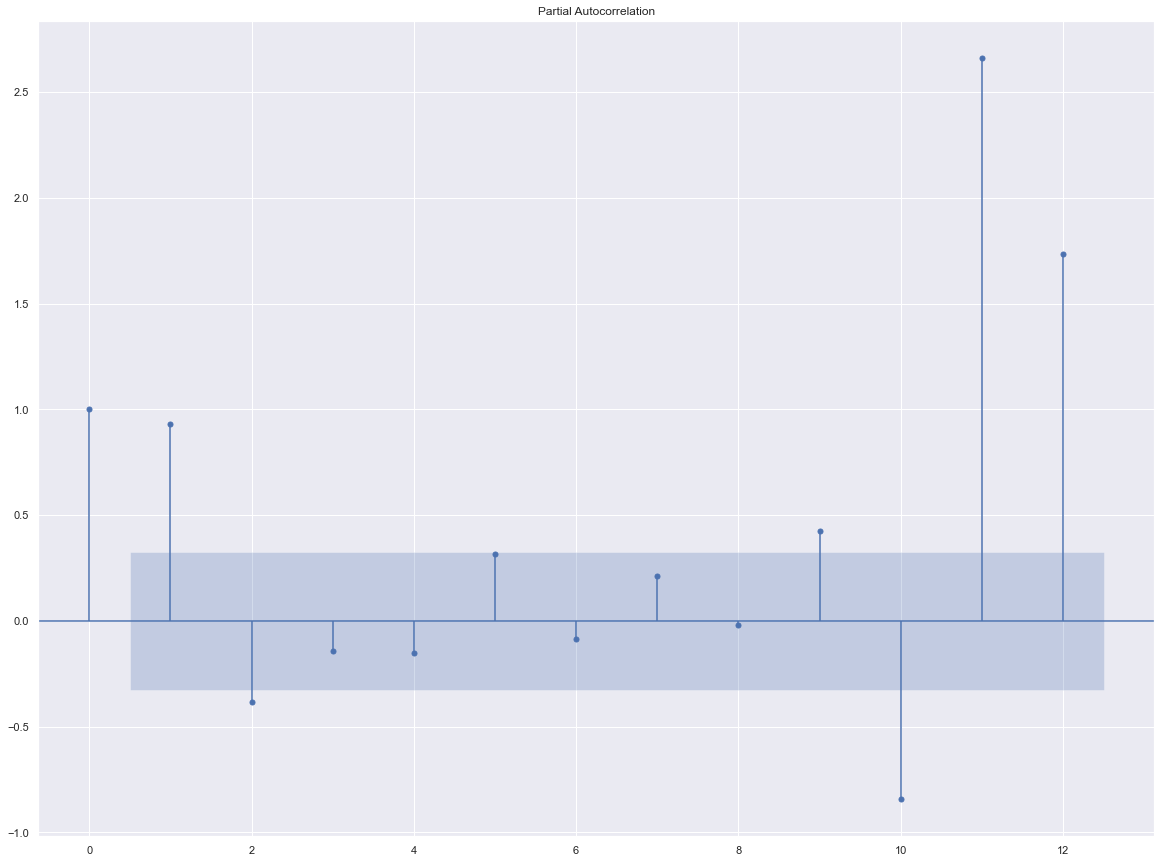

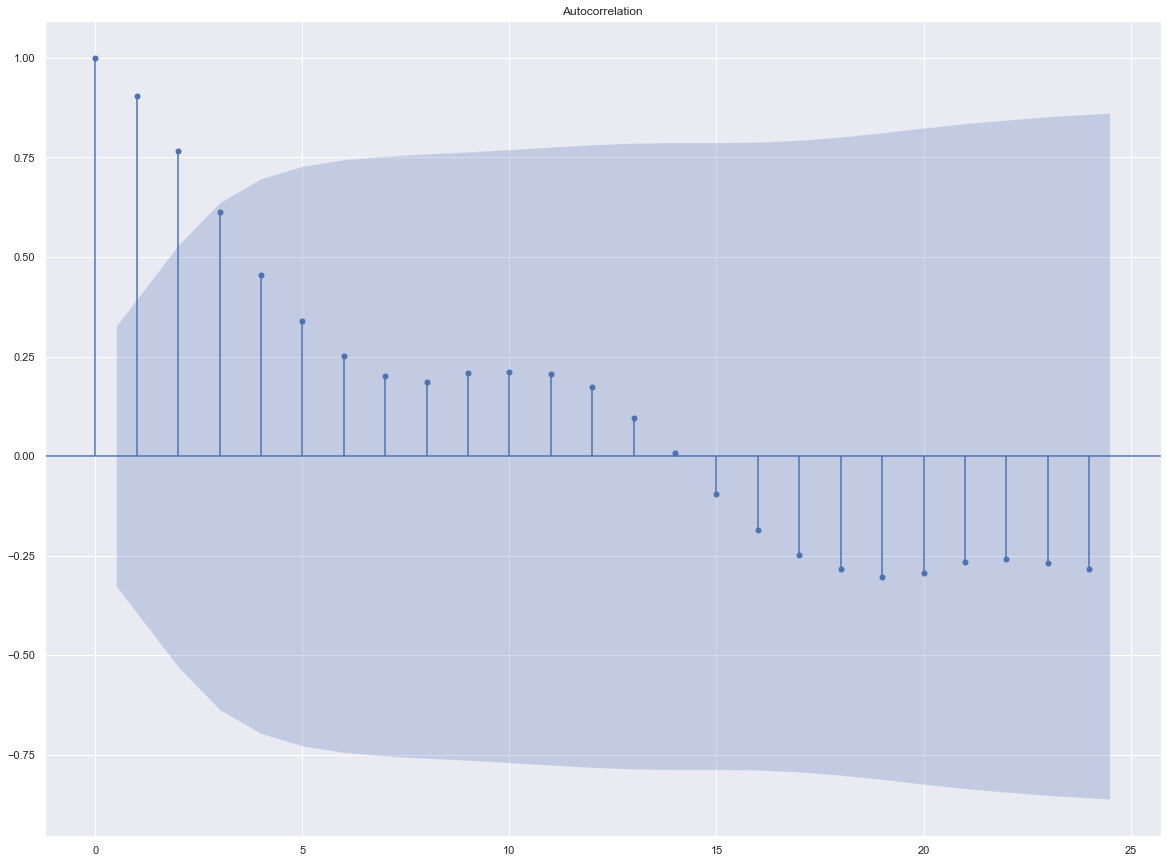

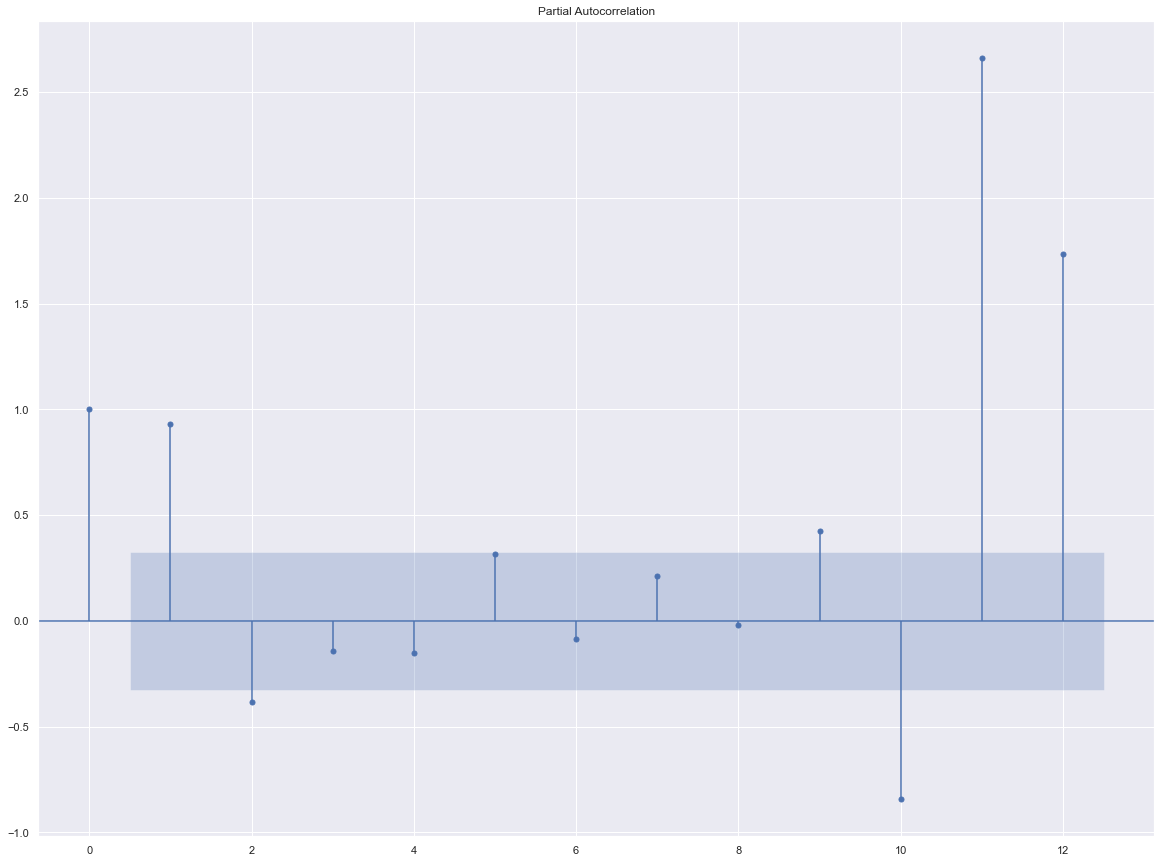

In [59]:
plot_acf(df_Sales['Sales'], lags=24)
plot_pacf(df_Sales['Sales'], lags = 12)

In [60]:
model = ARIMA(df_Sales['Sales'], (1, 1, 1))
res_111 = model.fit()
print(res_111.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -268.961
Method:                       css-mle   S.D. of innovations            516.307
Date:                Fri, 15 Apr 2022   AIC                            545.921
Time:                        10:19:41   BIC                            552.143
Sample:                             1   HQIC                           548.069
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           137.8786     38.017      3.627      0.000      63.367     212.390
ar.L1.D.Sales     0.8535      0.112      7.614      0.000       0.634       1.073
ma.L1.D.Sales    -1.0000      0.068    -

In [ ]:
sarima_model = SARIMAX(train['Sales'], order = (0, 1, 2), seasonal_order=(0, 1, 2, 12))
